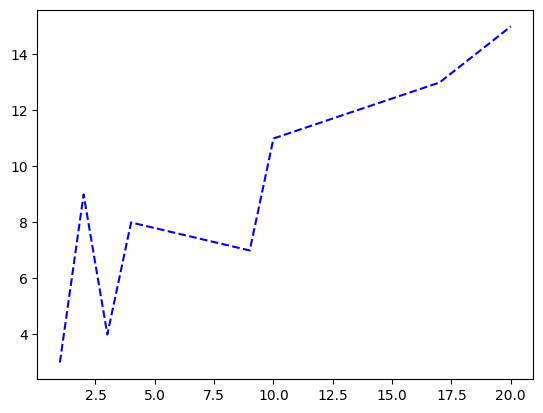

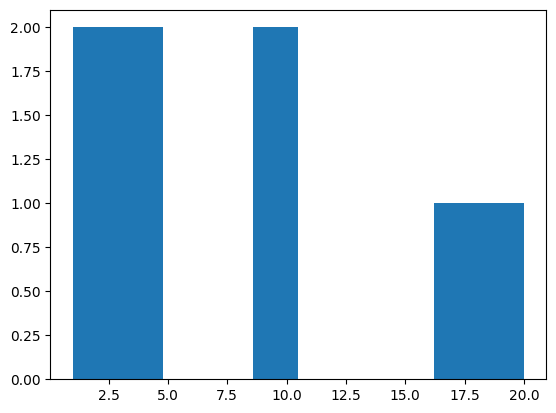

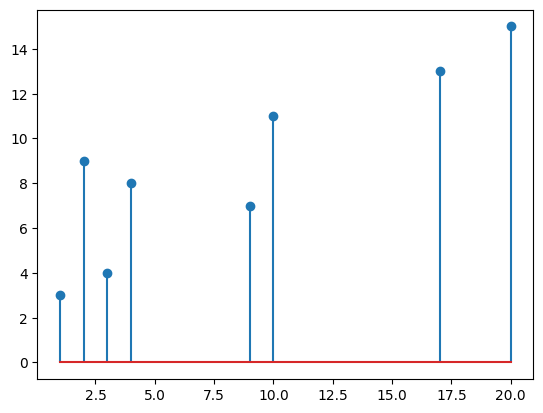

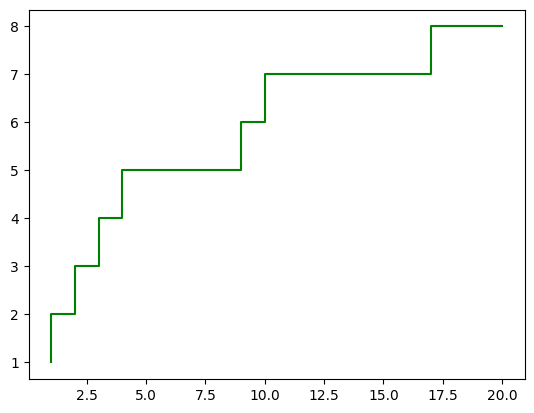

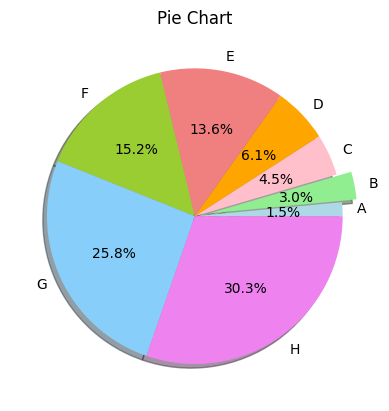

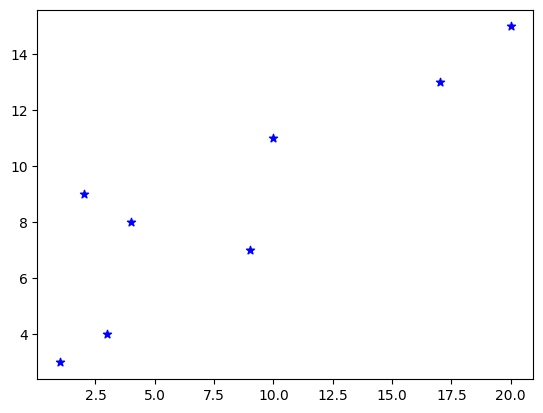

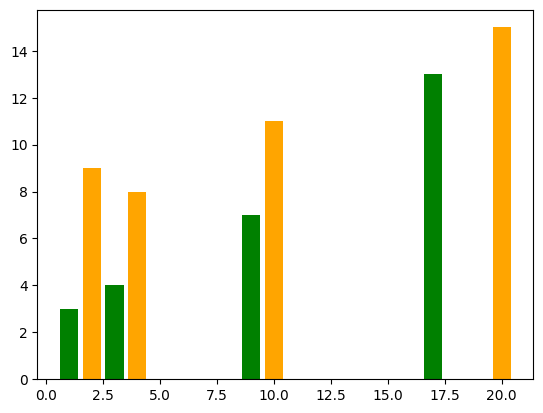

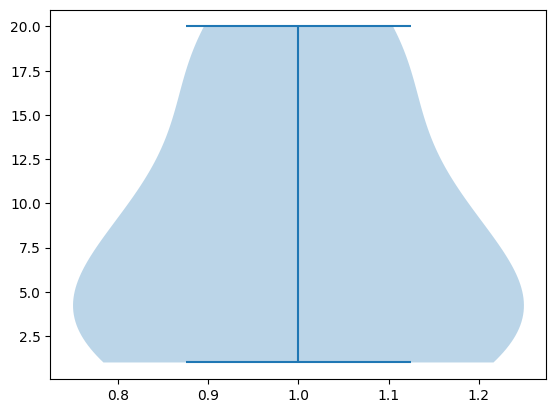

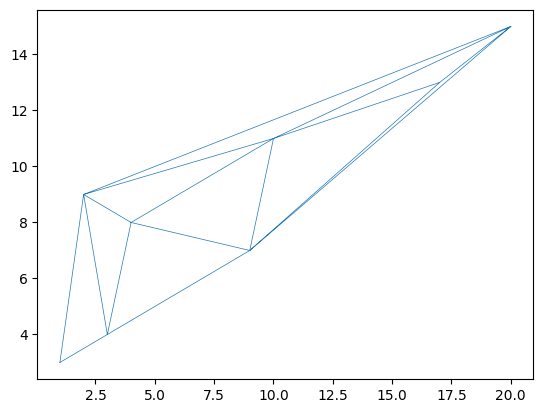

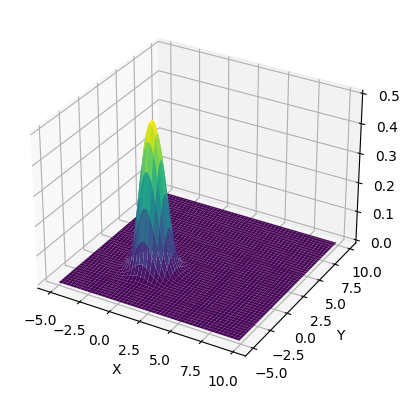

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([1, 2, 3, 4, 9, 10, 17, 20])
y = np.array([3, 9, 4, 8, 7, 11, 13, 15])
z=np.array([1,2,3,4,5,6,7,8])

X, Y = np.meshgrid(x, y)
Z = X + Y

plt.plot(x, y,color="blue",linestyle="--")
plt.show()

plt.hist(x)
plt.show()

plt.stem(x, y)
plt.show()

plt.step(x,z,color="green")
plt.show()
plt.pie(x, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
        autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'pink', 'orange', 'lightcoral', 'yellowgreen', 'lightskyblue', 'violet'],
        explode=[0, 0.1, 0, 0, 0, 0, 0, 0],shadow=True)
plt.title('Pie Chart')
plt.show()

plt.scatter(x, y,c="blue",marker='*')
plt.show()

plt.bar(x,y, color=["green","orange"])
plt.show()

plt.violinplot(x)
plt.show

plt.boxplot(x)
plt.show()

plt.triplot(x,y ,linewidth=0.5, antialiased=True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid for x and y values
num1 = np.arange(-5, 10, 0.1)
num2 = np.arange(-5, 10, 0.1)
X, Y = np.meshgrid(num1, num2)

# Calculate the sigmoid function values for Z
Z = 1 / (1 + np.exp(+(X**2 + Y**2)))

# Plot the 3D sigmoid tower
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.show()

def f(x, y):
    return 1 / (1 + np.exp(-(x + 2*y - 2))) + 1 / (1 + np.exp(-(2*x + y - 3)))

# Gradient of the function
def grad_f(x, y):
    grad_x = np.exp(-(x + 2*y - 2)) / (1 + np.exp(-(x + 2*y - 2)))**2 + 2 * np.exp(-(2*x + y - 3)) / (1 + np.exp(-(2*x + y - 3)))**2
    grad_y = 2 * np.exp(-(x + 2*y - 2)) / (1 + np.exp(-(x + 2*y - 2)))**2 + np.exp(-(2*x + y - 3)) / (1 + np.exp(-(2*x + y - 3)))**2
    return grad_x, grad_y

# Gradient descent parameters
learning_rate = 0.1
num_iterations = 50

# Initialize starting point
x_start = 0
y_start = 0

# Create the meshgrid for x and y values
num1 = np.arange(-5, 5, 0.1)
num2 = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(num1, num2)

# Calculate the function values for Z
Z = f(X, Y)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Perform gradient descent and capture frames
x_current = x_start
y_current = y_start
for _ in range(num_iterations):
    grad_x, grad_y = grad_f(x_current, y_current)
    x_current -= learning_rate * grad_x
    y_current -= learning_rate * grad_y
    z_current = f(x_current, y_current)
    ax.scatter(x_current, y_current, z_current, color='red', s=50)






In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your data
file_path = '/content/drive/MyDrive/Learning Based Approach for 3d Reconstruction using Satellite Image/Google Sheet/Paper_analysis.gsheet'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter and clean the data for the desired years (2019-2024)
data = data[data['Year'].between(2019, 2024)][['Year', 'Keywords']].dropna()
data['Keywords'] = data['Keywords'].str.replace('\n', ' ')

# Count papers per year and most popular keyword for each year
yearly_data = {}
for year, group in data.groupby('Year'):
    yearly_data[year] = {
        'count': group.shape[0],
        'keywords': [kw.strip() for sublist in group['Keywords'] for kw in sublist.split(",")]
    }

for year, data_dict in yearly_data.items():
    keyword_counts = Counter(data_dict['keywords'])
    most_common_keyword = keyword_counts.most_common(1)[0][0]
    data_dict['most_common_keyword'] = most_common_keyword

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

years = list(yearly_data.keys())
counts = [data_dict['count'] for data_dict in yearly_data.values()]
ax.plot(years, counts, marker='o', color='orange', linewidth=2, label='Number of Papers')

for year, data_dict in yearly_data.items():
    ax.text(year, data_dict['count'] + 0.2, data_dict['most_common_keyword'], ha='center', va='bottom', fontsize=10, color='blue', fontweight='bold')

ax.set_title('Trends in Paper Publications (2019-2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Papers', fontsize=12)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.grid(axis='both', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OSError: [Errno 95] Operation not supported: '/content/drive/MyDrive/Learning Based Approach for 3d Reconstruction using Satellite Image/Google Sheet/Paper_analysis.gsheet'

In [ ]:
import pandas as pd
   import matplotlib.pyplot as plt
   from collections import Counter
   from google.colab import drive
   import gspread
   from df2gspread import df2gspread as d2g
   from oauth2client.client import GoogleCredentials


   # Mount Google Drive
   drive.mount('/content/drive')

   # Authorize access to Google Sheets
   gc = gspread.authorize(GoogleCredentials.get_application_default())

   # Load your data using the Google Sheet ID
   spreadsheet_id = 'your_spreadsheet_id'  # Replace with your Google Sheet ID
   worksheet_name = 'Sheet1'  # Replace with your sheet name
   worksheet = gc.open_by_key(spreadsheet_id).worksheet(worksheet_name)

   # Convert Google Sheet data to a pandas DataFrame
   data = pd.DataFrame(worksheet.get_all_records())

   # Proceed with the rest of your code...
   # Filter and clean the data for the desired years (2019-2024)
   data = data[data['Year'].between(2019, 2024)][['Year', 'Keywords']].dropna()
   data['Keywords'] = data['Keywords'].str.replace('\n', ' ')

   # ... rest of your code (count papers, plot, etc.)